In [19]:
import numpy as np
from matplotlib import pyplot as plt
from astroML.datasets import sdss_corrected_spectra

#----------------------------------------------------------------------
# Use pre-computed PCA to reconstruct spectra
data = sdss_corrected_spectra.fetch_sdss_corrected_spectra()
spectra_raw = data['spectra']
spectra_corr = sdss_corrected_spectra.reconstruct_spectra(data)
wavelengths = sdss_corrected_spectra.compute_wavelengths(data)

#------------------------------------------------------------
# select random spectra
np.random.seed(5)
nrows = 5
ncols = 3
ind = np.random.randint(spectra_corr.shape[0], size=nrows * ncols)
spec_sample_raw = spectra_raw[ind]
spec_sample_corr = spectra_corr[ind]

In [20]:
data = sdss_corrected_spectra.fetch_sdss_corrected_spectra()

# Check the shapes of the main components
spectra_raw = data['spectra']
spectra_corr = sdss_corrected_spectra.reconstruct_spectra(data)
wavelengths = sdss_corrected_spectra.compute_wavelengths(data)

print(f"Raw Spectra Shape: {spectra_raw.shape}")
print(f"Reconstructed Spectra Shape: {spectra_corr.shape}")
print(f"Wavelengths Shape: {wavelengths.shape}")


Raw Spectra Shape: (4000, 1000)
Reconstructed Spectra Shape: (4000, 1000)
Wavelengths Shape: (1000,)


/var/folders/qy/y3tkp0tj7jz6c6g7_74w916c0000gn/T/ipykernel_2481/1814329569.py:10: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-k" (-> color='k'). The keyword argument will take precedence.
  ax.plot(wavelengths, spec_sample_corr[ncols * j + i], '-k', lw=1, c='blue')


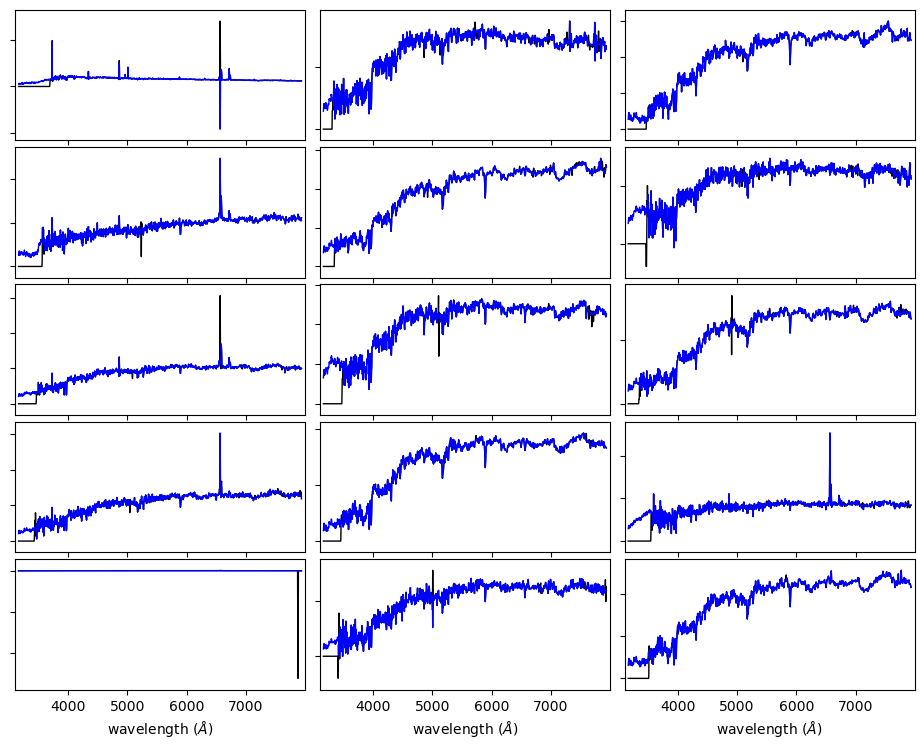

In [21]:
fig = plt.figure(figsize=(10, 8))

fig.subplots_adjust(left=0.05, right=0.95, wspace=0.05,
                    bottom=0.1, top=0.95, hspace=0.05)

for i in range(ncols):
    for j in range(nrows):
        ax = fig.add_subplot(nrows, ncols, ncols * j + 1 + i)
        ax.plot(wavelengths, spec_sample_raw[ncols * j + i], '-k', lw=1)
        ax.plot(wavelengths, spec_sample_corr[ncols * j + i], '-k', lw=1, c='blue')               
        ax.set_xlim(3100, 7999)

        ax.yaxis.set_major_formatter(plt.NullFormatter())
        ax.xaxis.set_major_locator(plt.MultipleLocator(1000))
        if j < nrows - 1:
            ax.xaxis.set_major_formatter(plt.NullFormatter())
        else:
            plt.xlabel(r'wavelength $(\AA)$')

        ylim = ax.get_ylim()
        dy = 0.05 * (ylim[1] - ylim[0])
        ax.set_ylim(ylim[0] - dy, ylim[1] + dy)

plt.show()

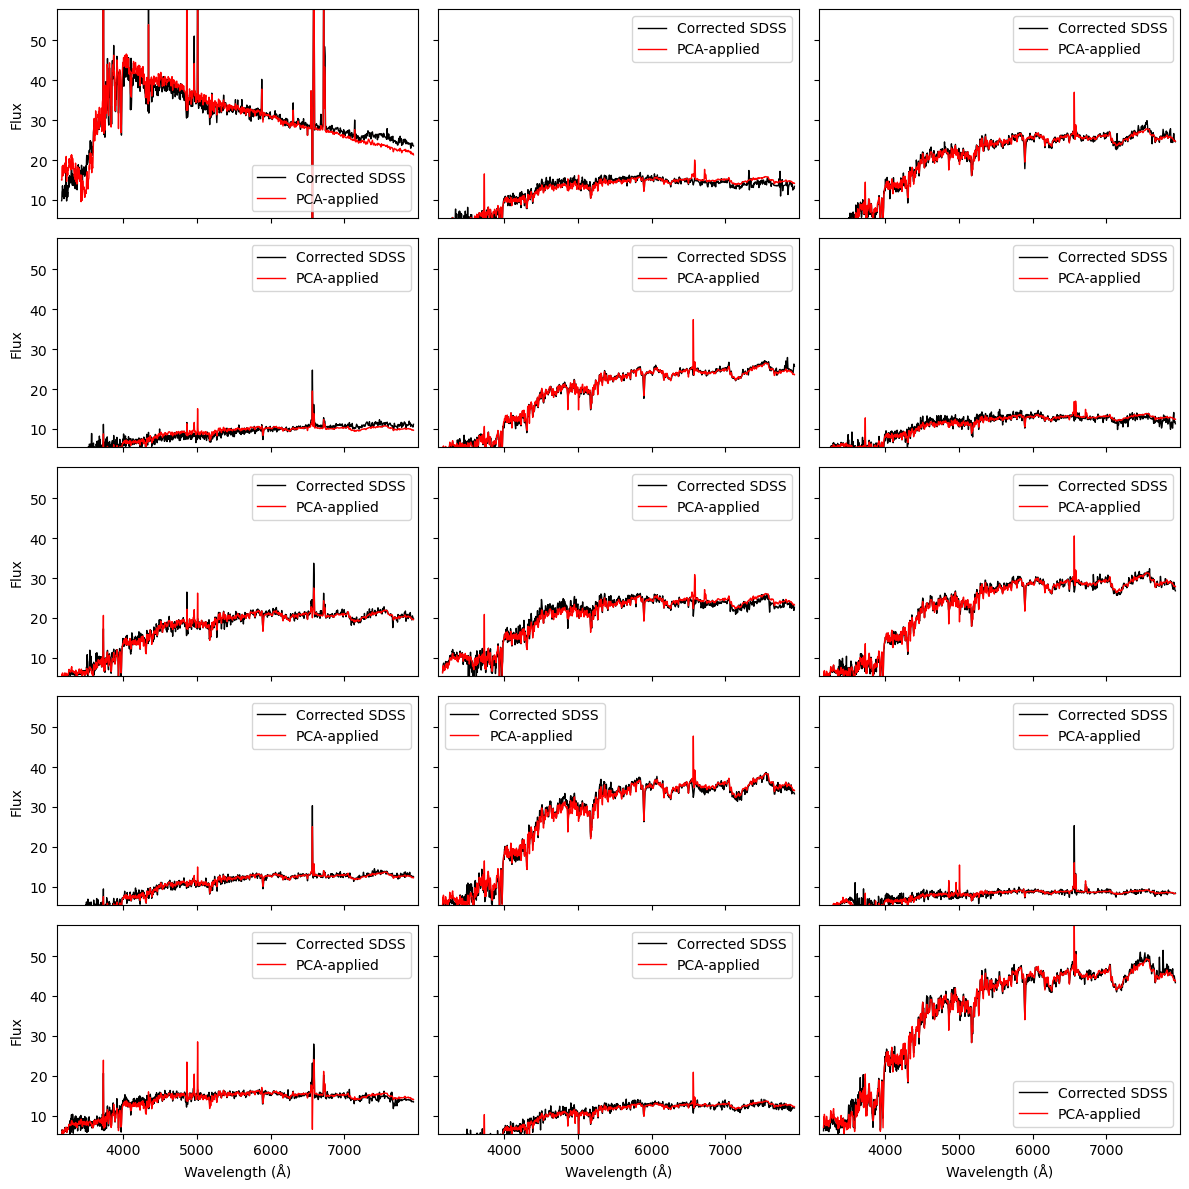

In [24]:
from sklearn.decomposition import PCA
import numpy as np
from matplotlib import pyplot as plt
from astroML.datasets import sdss_corrected_spectra

# Fetch and reconstruct SDSS spectra
data = sdss_corrected_spectra.fetch_sdss_corrected_spectra()
spectra_raw = data['spectra']
spectra_corr = sdss_corrected_spectra.reconstruct_spectra(data)
wavelengths = sdss_corrected_spectra.compute_wavelengths(data)

# Apply PCA to the corrected spectra
pca = PCA(n_components=4)  # Adjust n_components as needed
spectra_corr_pca = pca.fit_transform(spectra_corr)

# Optionally, you can reconstruct PCA-applied spectra if needed
spectra_corr_pca_reconstructed = pca.inverse_transform(spectra_corr_pca)

# Select and plot random spectra
np.random.seed(5)
nrows = 5
ncols = 3
ind = np.random.randint(spectra_corr.shape[0], size=nrows * ncols)
spec_sample_raw = spectra_raw[ind]
spec_sample_corr = spectra_corr[ind]
spec_sample_corr_pca = spectra_corr_pca_reconstructed[ind]

fig, axs = plt.subplots(nrows, ncols, figsize=(12, 12), sharex=True, sharey=True)

for i in range(ncols):
    for j in range(nrows):
        idx = ncols * j + i
        ax = axs[j, i]
        ax.plot(wavelengths, spec_sample_corr[idx], '-k', lw=1, label='Corrected SDSS')
        ax.plot(wavelengths, spec_sample_corr_pca[idx], '-r', lw=1, label='PCA-applied')
        ax.set_xlim(3100, 7999)
        ax.set_ylim(min(np.min(spec_sample_corr[idx]), np.min(spec_sample_corr_pca[idx])),
                    max(np.max(spec_sample_corr[idx]), np.max(spec_sample_corr_pca[idx])))

        if j == nrows - 1:
            ax.set_xlabel('Wavelength (Å)')
        if i == 0:
            ax.set_ylabel('Flux')

        ax.legend()

fig.tight_layout()
plt.show()


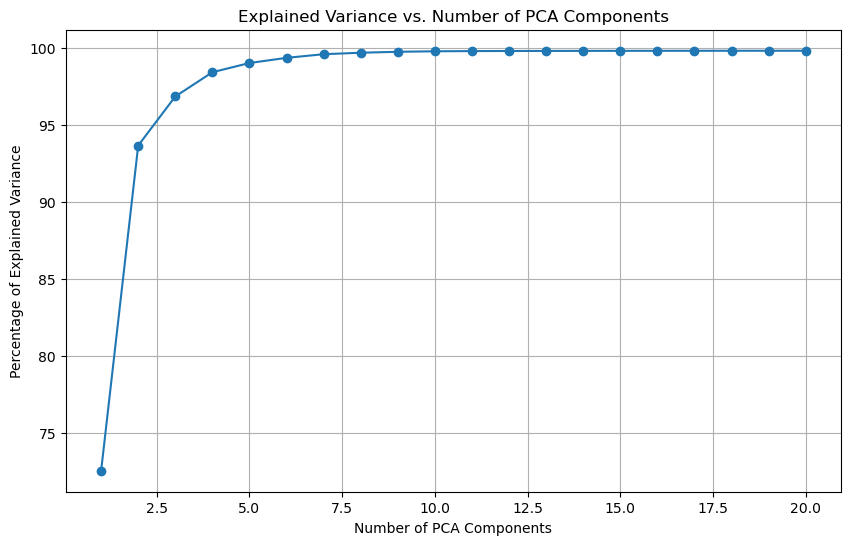

In [25]:
import numpy as np
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
from astroML.datasets import sdss_corrected_spectra

# Fetch the SDSS spectra data
data = sdss_corrected_spectra.fetch_sdss_corrected_spectra()
spectra_corr = sdss_corrected_spectra.reconstruct_spectra(data)

# Fit PCA and calculate explained variance for a range of components
n_components = np.arange(1, 21)  # Number of components to test
explained_variance_ratios = []

for n in n_components:
    pca = PCA(n_components=n)
    pca.fit(spectra_corr)
    explained_variance_ratios.append(np.sum(pca.explained_variance_ratio_))

# Plot the percentage of explained variance against the number of components
plt.figure(figsize=(10, 6))
plt.plot(n_components, np.array(explained_variance_ratios) * 100, marker='o')
plt.xlabel('Number of PCA Components')
plt.ylabel('Percentage of Explained Variance')
plt.title('Explained Variance vs. Number of PCA Components')
plt.grid(True)
plt.show()


Following cell can be explained as follows

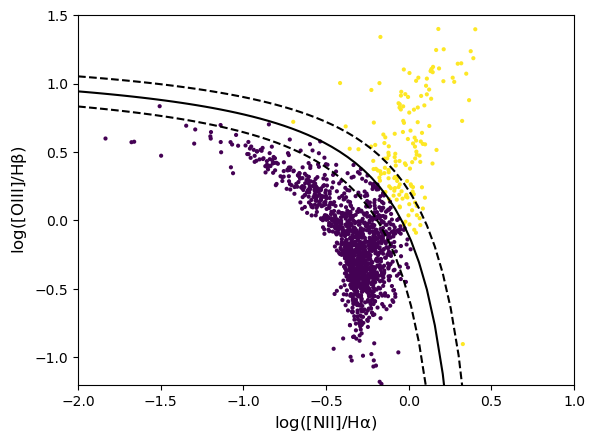

In [22]:
from astroML.datasets import fetch_sdss_corrected_spectra
from astroML.datasets.tools.sdss_fits import log_OIII_Hb_NII

i = np.where((data['lineindex_cln'] == 4) | (data['lineindex_cln'] == 5))

plt.scatter(data['log_NII_Ha'][i], data['log_OIII_Hb'][i],
            c=data['lineindex_cln'][i], s=9, lw=0)

NII = np.linspace(-2.0, 0.35)
plt.plot(NII, log_OIII_Hb_NII(NII), '-k')
plt.plot(NII, log_OIII_Hb_NII(NII, 0.1), '--k')
plt.plot(NII, log_OIII_Hb_NII(NII, -0.1), '--k')
plt.xlim(-2.0, 1.0)
plt.ylim(-1.2, 1.5)

plt.xlabel(r'$\mathrm{log([NII]/H\alpha)}$', fontsize='large')
plt.ylabel(r'$\mathrm{log([OIII]/H\beta)}$', fontsize='large')
plt.show()

/var/folders/qy/y3tkp0tj7jz6c6g7_74w916c0000gn/T/ipykernel_2481/3693327948.py:44: RuntimeWarning: invalid value encountered in log10
  log_NII_Ha = np.log10(fluxes['NII'] / fluxes['Ha'])
/var/folders/qy/y3tkp0tj7jz6c6g7_74w916c0000gn/T/ipykernel_2481/3693327948.py:44: RuntimeWarning: invalid value encountered in log10
  log_NII_Ha = np.log10(fluxes['NII'] / fluxes['Ha'])
/var/folders/qy/y3tkp0tj7jz6c6g7_74w916c0000gn/T/ipykernel_2481/3693327948.py:45: RuntimeWarning: invalid value encountered in log10
  log_OIII_Hb = np.log10(fluxes['OIII'] / fluxes['Hb'])


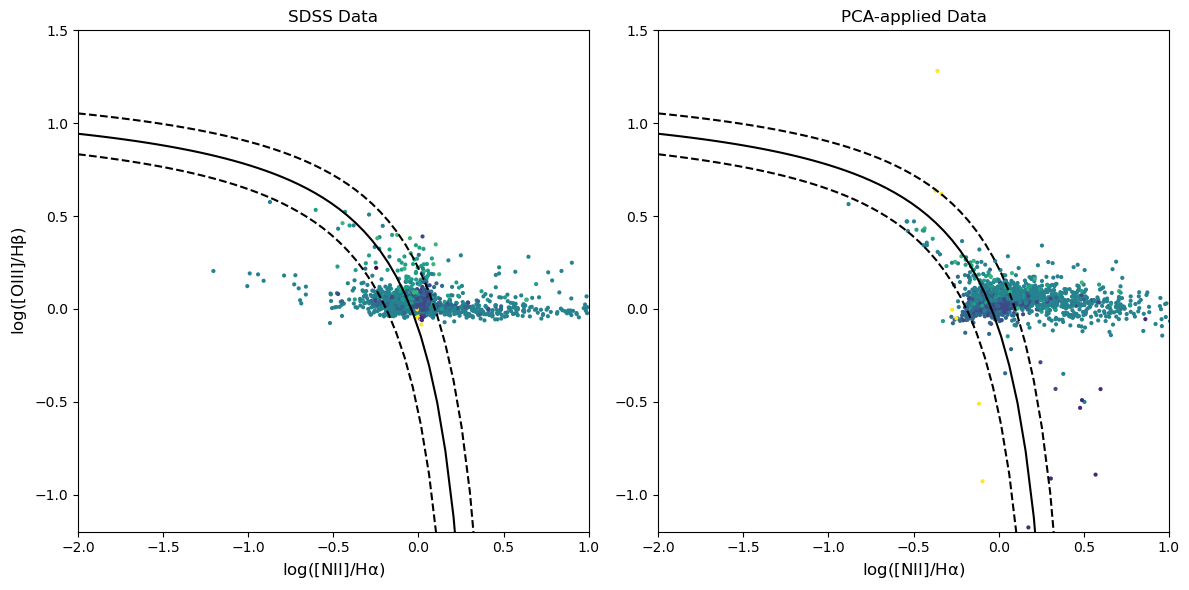

In [32]:
import numpy as np
from astroML.datasets import sdss_corrected_spectra

def extract_line_fluxes(spectra, wavelengths, line_wavelengths):
    """
    Extract the flux of specific emission lines from the spectra.
    
    Parameters:
    spectra : array-like, shape (n_samples, n_features)
        The spectra data.
    wavelengths : array-like, shape (n_features,)
        The wavelengths corresponding to the spectra.
    line_wavelengths : dict
        Dictionary with line names as keys and wavelength ranges as values.
        
    Returns:
    fluxes : dict
        Dictionary with line names as keys and flux arrays as values.
    """
    fluxes = {line: np.zeros(spectra.shape[0]) for line in line_wavelengths}
    
    for line, (wl_min, wl_max) in line_wavelengths.items():
        # Find indices of the wavelength range
        mask = (wavelengths >= wl_min) & (wavelengths <= wl_max)
        for i in range(spectra.shape[0]):
            fluxes[line][i] = np.mean(spectra[i, mask])
    
    return fluxes

def compute_line_ratios(fluxes):
    """
    Compute the line ratios from the extracted fluxes.
    
    Parameters:
    fluxes : dict
        Dictionary with line names as keys and flux arrays as values.
        
    Returns:
    log_NII_Ha : array
        Logarithm of [NII]/Hα ratios.
    log_OIII_Hb : array
        Logarithm of [OIII]/Hβ ratios.
    """
    log_NII_Ha = np.log10(fluxes['NII'] / fluxes['Ha'])
    log_OIII_Hb = np.log10(fluxes['OIII'] / fluxes['Hb'])
    
    return log_NII_Ha, log_OIII_Hb

# Fetch and reconstruct SDSS spectra
data = sdss_corrected_spectra.fetch_sdss_corrected_spectra()
spectra_corr = sdss_corrected_spectra.reconstruct_spectra(data)
wavelengths = sdss_corrected_spectra.compute_wavelengths(data)

# Define wavelength ranges for emission lines (in Angstroms)
line_wavelengths = {
    'Ha': (6562.5 - 10, 6562.5 + 10),   # Hα
    'NII': (6583 - 10, 6583 + 10),       # [NII]
    'Hb': (4861 - 10, 4861 + 10),        # Hβ
    'OIII': (5007 - 10, 5007 + 10)       # [OIII]
}

# Extract line fluxes
fluxes = extract_line_fluxes(spectra_corr, wavelengths, line_wavelengths)

# Compute line ratios
log_NII_Ha, log_OIII_Hb = compute_line_ratios(fluxes)

# PCA Analysis
from sklearn.decomposition import PCA

# Apply PCA
pca = PCA(n_components=4)
spectra_corr_pca = pca.fit_transform(spectra_corr)
spectra_corr_pca_reconstructed = pca.inverse_transform(spectra_corr_pca)

# Extract line ratios from PCA-applied data
fluxes_pca = extract_line_fluxes(spectra_corr_pca_reconstructed, wavelengths, line_wavelengths)
log_NII_Ha_pca, log_OIII_Hb_pca = compute_line_ratios(fluxes_pca)

# Plotting
import matplotlib.pyplot as plt
from astroML.datasets.tools.sdss_fits import log_OIII_Hb_NII

plt.figure(figsize=(12, 6))

# SDSS Data
plt.subplot(1, 2, 1)
plt.scatter(log_NII_Ha, log_OIII_Hb, c=data['lineindex_cln'], s=9, lw=0)
NII = np.linspace(-2.0, 0.35)
plt.plot(NII, log_OIII_Hb_NII(NII), '-k')
plt.plot(NII, log_OIII_Hb_NII(NII, 0.1), '--k')
plt.plot(NII, log_OIII_Hb_NII(NII, -0.1), '--k')
plt.xlim(-2.0, 1.0)
plt.ylim(-1.2, 1.5)
plt.xlabel(r'$\mathrm{log([NII]/H\alpha)}$', fontsize='large')
plt.ylabel(r'$\mathrm{log([OIII]/H\beta)}$', fontsize='large')
plt.title('SDSS Data')

# PCA-applied Data
plt.subplot(1, 2, 2)
plt.scatter(log_NII_Ha_pca, log_OIII_Hb_pca, c=data['lineindex_cln'], s=9, lw=0)
plt.plot(NII, log_OIII_Hb_NII(NII), '-k')
plt.plot(NII, log_OIII_Hb_NII(NII, 0.1), '--k')
plt.plot(NII, log_OIII_Hb_NII(NII, -0.1), '--k')
plt.xlim(-2.0, 1.0)
plt.ylim(-1.2, 1.5)
plt.xlabel(r'$\mathrm{log([NII]/H\alpha)}$', fontsize='large')
plt.title('PCA-applied Data')

plt.tight_layout()
plt.show()
#?

In [6]:
from sklearn.decomposition import PCA

X = np.random.normal(size=(100, 3))
R = np.random.random((3, 10))
X = np.dot(X, R)

pca = PCA(n_components=4)
pca.fit(X)
comp = pca.transform(X)

mean = pca.mean_
components = pca.components_
var = pca.explained_variance_

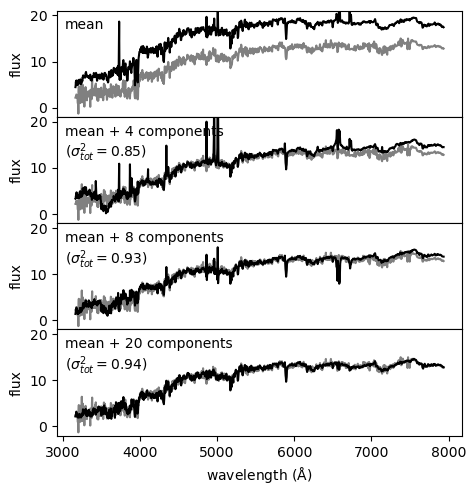

In [11]:
#------------------------------------------------------------
# Compute PCA components

# Eigenvalues can be computed using PCA as in the commented code below:

#from sklearn.decomposition import PCA
#pca = PCA()
#pca.fit(spectra_corr)
#evals = pca.explained_variance_ratio_
#evals_cs = evals.cumsum()

#  because the spectra have been reconstructed from masked values, this
#  is not exactly correct in this case: we'll use the values computed
#  in the file compute_sdss_pca.py
evals = data['evals'] ** 2
evals_cs = evals.cumsum()
evals_cs /= evals_cs[-1]
evecs = data['evecs']
spec_mean = spectra_corr.mean(0)

#------------------------------------------------------------
# Find the coefficients of a particular spectrum
spec = spectra_corr[1]
coeff = np.dot(evecs, spec - spec_mean)

#------------------------------------------------------------
# Plot the sequence of reconstructions
fig = plt.figure(figsize=(5, 5))
fig.subplots_adjust(hspace=0, top=0.95, bottom=0.1, left=0.12, right=0.93)

for i, n in enumerate([0, 4, 8, 20]):
    ax = fig.add_subplot(411 + i)
    ax.plot(wavelengths, spec, '-', c='gray')
    ax.plot(wavelengths, spec_mean + np.dot(coeff[:n], evecs[:n]), '-k')

    if i < 3:
        ax.xaxis.set_major_formatter(plt.NullFormatter())

    ax.set_ylim(-2, 21)
    ax.set_ylabel('flux')

    if n == 0:
        text = "mean"
    elif n == 1:
        text = "mean + 1 component\n"
        text += r"$(\sigma^2_{tot} = %.2f)$" % evals_cs[n - 1]
    else:
        text = "mean + %i components\n" % n
        text += r"$(\sigma^2_{tot} = %.2f)$" % evals_cs[n - 1]

    ax.text(0.02, 0.93, text, ha='left', va='top', transform=ax.transAxes)

fig.axes[-1].set_xlabel(r'${\rm wavelength\ (\AA)}$')
plt.show()

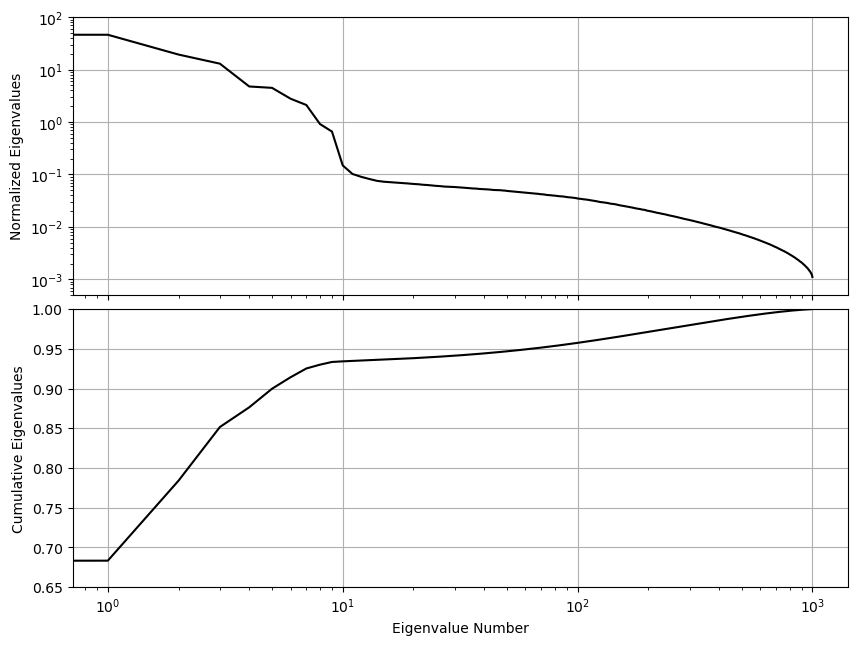

In [12]:
fig = plt.figure(figsize=(10, 7.5))
fig.subplots_adjust(hspace=0.05, bottom=0.12)

ax = fig.add_subplot(211, xscale='log', yscale='log')
ax.grid()
ax.plot(evals, c='k')
ax.set_ylabel('Normalized Eigenvalues')
ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.set_ylim(5E-4, 100)

ax = fig.add_subplot(212, xscale='log')
ax.grid()
ax.semilogx(evals_cs, color='k')
ax.set_xlabel('Eigenvalue Number')
ax.set_ylabel('Cumulative Eigenvalues')
ax.set_ylim(0.65, 1.00)

plt.show()

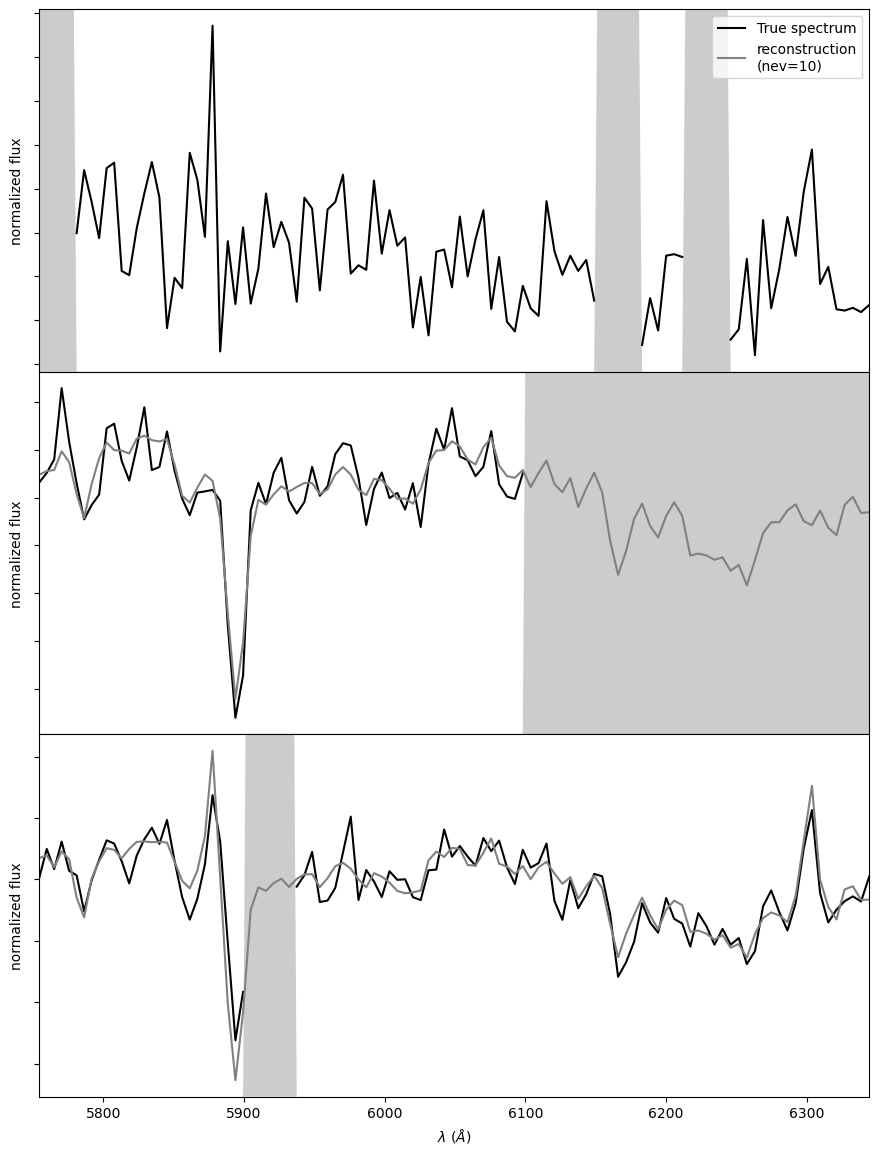

In [14]:
from matplotlib import ticker

evecs = data['evecs']
mu = data['mu']
norms = data['norms']
mask = data['mask']

#------------------------------------------------------------
# plot the results
i_plot = ((wavelengths > 5750) & (wavelengths < 6350))
wavelength = wavelengths[i_plot]

specnums = [20, 8, 9]
subplots = [311, 312, 313]

fig = plt.figure(figsize=(10, 12.5))
fig.subplots_adjust(left=0.09, bottom=0.08, hspace=0, right=0.92, top=0.95)

for subplot, i in zip(subplots, specnums):
    ax = fig.add_subplot(subplot)

    # compute eigen-coefficients
    spectra_i_centered = spectra_corr[i] / norms[i] - mu
    coeffs = np.dot(spectra_i_centered, evecs.T)

    # blank out masked regions
    spectra_i = spectra_corr[i]
    mask_i = mask[i]
    spectra_i[mask_i] = np.nan

    # plot the raw masked spectrum
    ax.plot(wavelength, spectra_i[i_plot], '-', color='k',
            label='True spectrum', lw=1.5)

    # plot two levels of reconstruction
    for nev in [10]:
        if nev == 0:
            label = 'mean'
        else:
            label = 'reconstruction\n(nev=%i)' % nev
        spectra_i_recons = norms[i] * (mu + np.dot(coeffs[:nev], evecs[:nev]))
        ax.plot(wavelength, spectra_i_recons[i_plot], label=label, color='grey')

    # plot shaded background in masked region
    ylim = ax.get_ylim()
    mask_shade = ylim[0] + mask[i][i_plot].astype(float) * ylim[1]
    plt.fill(np.concatenate([wavelength[:1], wavelength, wavelength[-1:]]),
             np.concatenate([[ylim[0]], mask_shade, [ylim[0]]]),
             lw=0, fc='k', alpha=0.2)

    ax.set_xlim(wavelength[0], wavelength[-1])
    ax.set_ylim(ylim)
    ax.yaxis.set_major_formatter(ticker.NullFormatter())

    if subplot == 311:
        ax.legend(loc=1)

    ax.set_xlabel('$\lambda\ (\AA)$')
    ax.set_ylabel('normalized flux')

plt.show()

In [15]:
from sklearn.decomposition import NMF

X = np.random.random((100, 3))  # 100 points in 3 dims, all positive
nmf = NMF(n_components=3)  # setting n_components is optional
nmf.fit(X)
proj = nmf.transform(X)  # project to 3 dimensions

comp = nmf.components_  # 3 x 10 array of components
err = nmf.reconstruction_err_  # how well 3 components captures data

In [16]:
from sklearn.decomposition import FastICA

X = np.random.normal(size=(100, 2))  # 100 pts in 2 dims
R = np.random.random((2, 5))  # mixing matrix
X = np.dot(X, R)  # X is now 2D data in 5D space
ica = FastICA(2)  # fit two components

sources = ica.fit_transform(X)
proj = ica.transform(X)  # 100 x 2 projection of data
comp = ica.components_  # the 2 x 5 matrix of indep. components

/opt/anaconda3/lib/python3.11/site-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(


/opt/anaconda3/lib/python3.11/site-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(


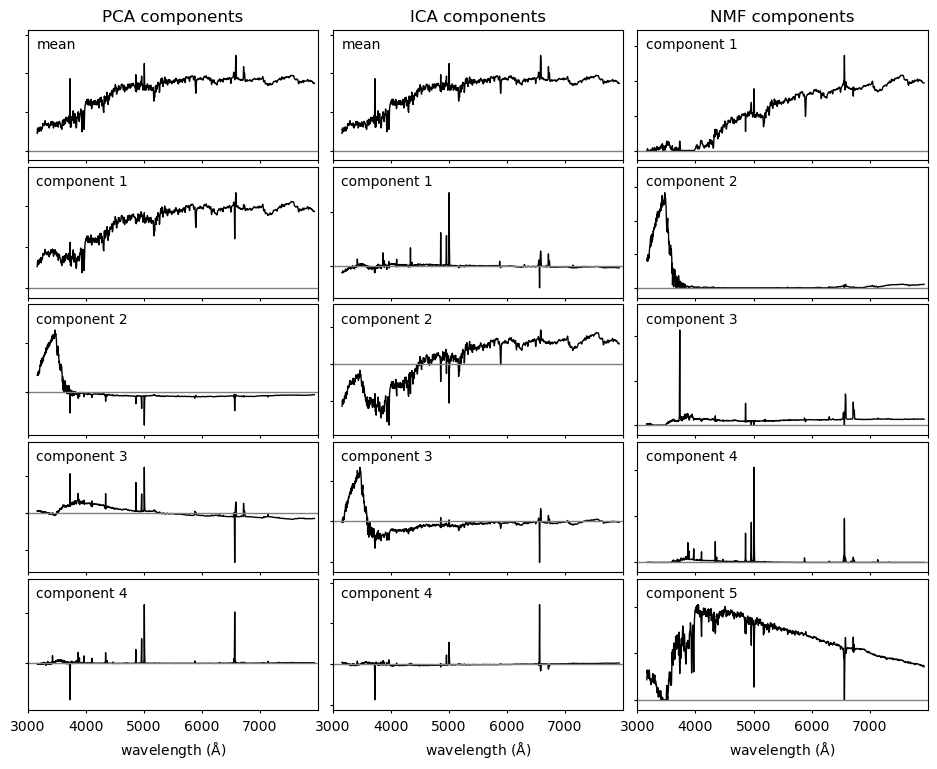

In [17]:
from sklearn.decomposition import NMF, FastICA, PCA

data = sdss_corrected_spectra.fetch_sdss_corrected_spectra()
spectra = sdss_corrected_spectra.reconstruct_spectra(data)
wavelengths = sdss_corrected_spectra.compute_wavelengths(data)

#----------------------------------------------------------------------
# Compute PCA, ICA, and NMF components
def compute_PCA_ICA_NMF(n_components=5):
    spec_mean = spectra.mean(0)

    # PCA: use randomized PCA for speed
    pca = PCA(n_components - 1, random_state=0, svd_solver='randomized')
    pca.fit(spectra)
    pca_comp = np.vstack([spec_mean,
                          pca.components_])

    # ICA treats sequential observations as related.  Because of this, we need
    # to fit with the transpose of the spectra
    ica = FastICA(n_components - 1, random_state=0)
    ica.fit(spectra.T)
    ica_comp = np.vstack([spec_mean,
                          ica.transform(spectra.T).T])

    # NMF requires all elements of the input to be greater than zero
    spectra[spectra < 0] = 0
    nmf = NMF(n_components, random_state=0)
    nmf.fit(spectra)
    nmf_comp = nmf.components_

    return pca_comp, ica_comp, nmf_comp

n_components = 5
decompositions = compute_PCA_ICA_NMF(n_components)

#----------------------------------------------------------------------
# Plot the results
fig = plt.figure(figsize=(10, 8))
fig.subplots_adjust(left=0.05, right=0.95, wspace=0.05,
                    bottom=0.1, top=0.95, hspace=0.05)

titles = ['PCA components', 'ICA components', 'NMF components']

for i, comp in enumerate(decompositions):
    for j in range(n_components):
        ax = fig.add_subplot(n_components, 3, 3 * j + 1 + i)

        ax.yaxis.set_major_formatter(plt.NullFormatter())
        ax.xaxis.set_major_locator(plt.MultipleLocator(1000))
        if j < n_components - 1:
            ax.xaxis.set_major_formatter(plt.NullFormatter())
        else:
            ax.xaxis.set_major_locator(
                plt.FixedLocator(list(range(3000, 7999, 1000))))
            ax.set_xlabel(r'wavelength ${\rm (\AA)}$')

        ax.plot(wavelengths, comp[j], '-k', lw=1)

        # plot zero line
        xlim = [3000, 8000]
        ax.plot(xlim, [0, 0], '-', c='gray', lw=1)

        if j == 0:
            ax.set_title(titles[i])

        if titles[i].startswith('PCA') or titles[i].startswith('ICA'):
            if j == 0:
                label = 'mean'
            else:
                label = 'component %i' % j
        else:
            label = 'component %i' % (j + 1)

        ax.text(0.03, 0.94, label, transform=ax.transAxes,
                ha='left', va='top')

        for l in ax.get_xticklines() + ax.get_yticklines():
            l.set_markersize(2)

        # adjust y limits
        ylim = plt.ylim()
        dy = 0.05 * (ylim[1] - ylim[0])

        ax.set_ylim(ylim[0] - dy, ylim[1] + 4 * dy)
        ax.set_xlim(xlim)


plt.show()

In [34]:
from sklearn.decomposition import PCA

X = np.random.normal(size=(100, 3))
R = np.random.random((3, 10))
X = np.dot(X, R)

pca = PCA(n_components=4)
pca.fit(X)
comp = pca.transform(X)

mean = pca.mean_
components = pca.components_
var = pca.explained_variance_

In [41]:
comp

array([[-1.37132968e+00, -4.88229640e-01, -5.90506535e-01,
        -3.50469052e-16],
       [ 2.38365785e+00,  1.28067474e+00, -5.76041127e-01,
         5.62475936e-16],
       [ 1.74541870e+00, -9.60319708e-01,  1.99230234e+00,
         2.32323583e-16],
       [-4.99998279e-01, -5.55866935e-01,  1.08186129e-01,
        -1.24029490e-16],
       [-9.00564298e-01, -1.18443216e+00,  3.74521608e-01,
        -2.67381116e-16],
       [ 1.44832247e+00, -8.89081547e-01,  3.71795203e-01,
         1.64331844e-16],
       [-1.37194439e+00, -1.06260035e+00, -3.24670916e-01,
        -2.69436877e-16],
       [-9.98465600e-01, -3.71445286e-01, -1.61479818e+00,
        -1.58714873e-16],
       [ 6.11556410e+00,  1.29386105e-01, -4.10049541e-01,
         1.22709042e-15],
       [ 1.19962909e+00, -1.70604816e-01,  1.95669278e-01,
         2.32613536e-16],
       [ 3.57608377e+00, -3.87503937e-01, -1.03943353e+00,
         1.00428764e-15],
       [ 1.28144523e+00,  6.76767322e-01, -1.83773528e+00,
      

the document you referred to is a scientific paper from the Astrophysical Journal, which discusses the empirical OIII/Hβ and NII/Hα diagnostic lines used in the study of emission-line galaxies. These lines are part of the BPT (Baldwin, Phillips & Terlevich) diagram, which is a tool used to classify galaxies based on the ratios of certain emission lines.
Empirical OIII/Hβ and NII/Hα Lines
Purpose: The empirical OIII/Hβ and NII/Hα lines are used to distinguish between different types of ionizing sources in galaxies. Specifically, they help in differentiating between star-forming regions, active galactic nuclei (AGNs), and low-ionization nuclear emission-line regions (LINERs).
OIII/Hβ Line: The ratio of [OIII] λ5007 to Hβ is sensitive to the ionization state of the gas and the hardness of the ionizing radiation. Higher ratios typically indicate the presence of AGNs, as these environments produce harder radiation fields than star-forming regions.
NII/Hα Line: The ratio of [NII] λ6584 to Hα is used to assess the metallicity of the gas and the excitation mechanism. Higher NII/Hα ratios are indicative of AGNs or LINERs, while lower ratios suggest star-forming regions.
Diagnostic Diagram: By plotting these ratios against each other, researchers can classify the dominant ionization mechanism in a galaxy. The empirical lines on the BPT diagram serve as boundaries that separate the regions dominated by star formation from those influenced by AGNs or LINERs.
Empirical Calibration: The paper likely discusses how these lines are empirically calibrated using observations of galaxies with known properties. This calibration is crucial for accurately interpreting the emission line ratios and classifying galaxies.
These diagnostic lines are fundamental in extragalactic astronomy for understanding the physical conditions and processes occurring in galaxies. They provide insights into the nature of the ionizing sources and the chemical composition of the interstellar medium.